The code below trys to explore the last 2 bullet points of analyzing the history data. 

I followed the code that I found online:
https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

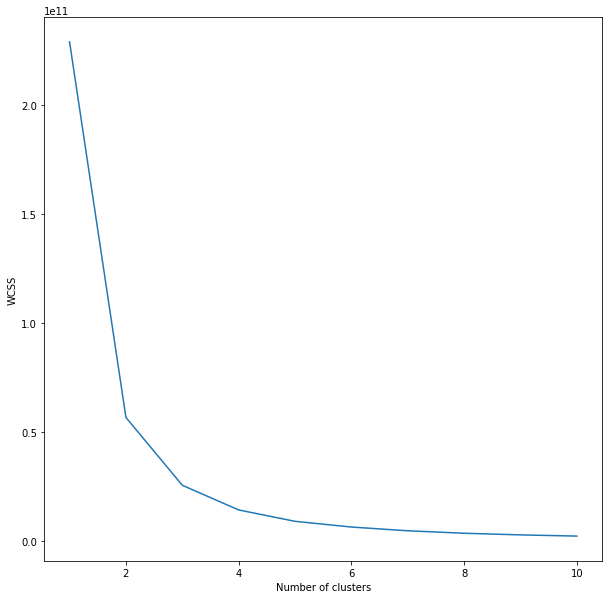

In [2]:
#lets look at k-means 
#finding appropriate number of clusters 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline 

history = pd.read_csv("user_history.csv")#.drop(['USER ID'],axis=1)
#using elbow method to find optimal number of clusters to partition history data
#kmeans = KMeans(n_clusters=2, random_state=0).fit(history)
wcss = []
for i in range(1,11):
    kmodel = KMeans(n_clusters = i, init = "k-means++")
    kmodel.fit(history)
    wcss.append(kmodel.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From graph we can see that the optimal number of clusters to partition the history data is 3. 



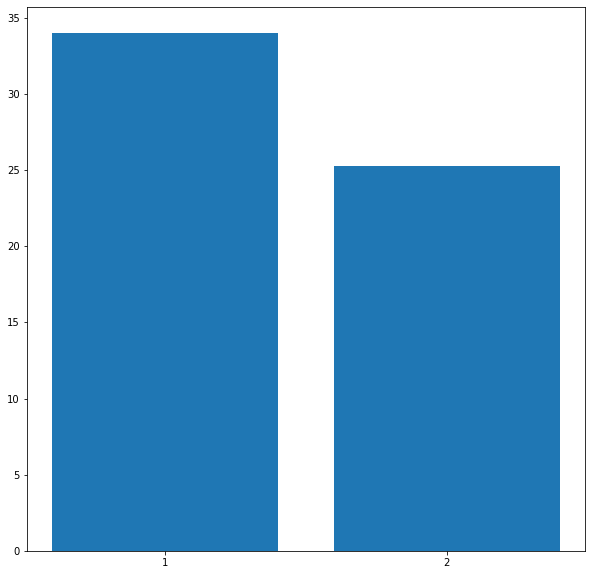

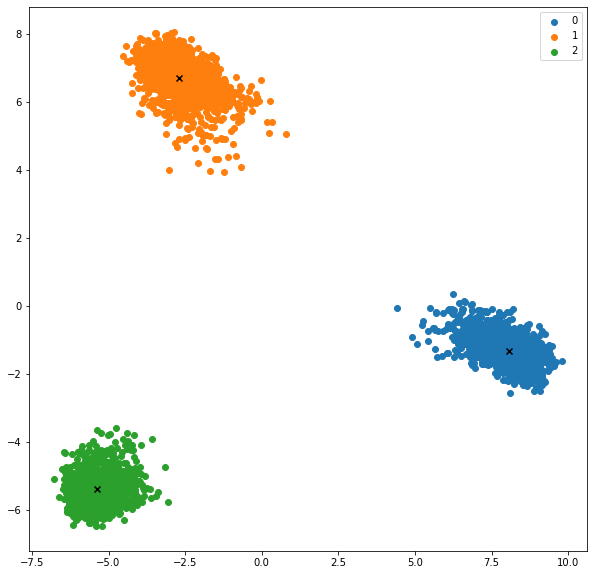

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
#change data into 2-dimensions
pca = PCA(2)
history = StandardScaler().fit_transform(history)
data = pca.fit_transform(history)

#check variance of components 
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

#train k means and pca
kmeans = cluster.KMeans(3)
kmeans.fit(data)

centers = np.array(kmeans.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
#plt.set_title('PCA', fontsize = 20)
plt.show()

In [4]:
#cov_matrix = np.cov(history)
#eigen_val = np.linalg.eig(cov_matrix)
from sklearn.linear_model import LinearRegression
#table of principle components 
his_pca = pd.DataFrame(data = data, columns = ['principal component 1', 'principal component 2'])
#print(his_pca)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#choose pc 1 as features since have higher variance ratio
features = np.zeros((4500, 75))
features[: , 0] = his_pca.iloc[:, 0]
user_ratings = pd.read_csv("user_ratings.csv")
user_ratings_table = pd.pivot_table(user_ratings,values='RATING', index=['USER ID'], columns='PRODUCT')
#print(user_ratings_table)
#mn = user_ratings_table[1:]
#print(mn)


Explained variation per principal component: [0.33984813 0.25309902]


In [5]:
y = features 
x = user_ratings_table

#step size 
#w0_n = 0
#w1_n = 0
#a = .04 
MSE = np.array([])

#for i in range(1,5):
  #  y_pred = np.array([])
   # error = np.array([])
    #error_x = np.array([])
    
    #w0 = w0_n 
    #w1 = w1_n
    
  #  for j in x:
  #      y_pred = np.append(y_pred,(w0 + w1*i))
  # error = np.append(error, y_pred-y)
   # error_x = np.append(error_x, error*x)
    #MSE_val = (error**2).mean()
    #MSE = np.append(MSE,MSE_val)
    
    #w0_n = w0 - a*np.sum(error)
    #w1_n = w1 - a*np.sum(error_x)


In [12]:
#https://medium.com/data-science-everyday/implementing-
#linear-regression-from-scratch-using-gradient-descent-fc6df5d8fd88

# Building the model
X = features 
Y = user_ratings_table
Y = Y.replace(np.nan,0) 

X_mean = np.mean(X) # mean of all X values in dataset
#print(X.iloc[0])
#for column in X:
  #  print(X[column])
#print(X_mean)
Y_mean = np.mean(Y) # mean of all the Y values in dataset
# Initialize values of numerator and denominator 
# for calculating the value of slope
num = 0
den = 1
#loop over all the datapoints and find the sums
print(len(X))
for column in range(len(X)):
    #print("h")
    #print(X[column] - X_mean)
    num = num + (X[column] - X_mean)#*(Y[column] - Y_mean)
    print(Y_mean)
    #den = den + (column - X_mean)**2
# calulate the slope
m = num / den
# calculate the intercept
c = Y_mean - m*X_mean

#loop over all the datapoints and find the sums 
predictions = []
# for each data point predict the value of y
for i in X:
    Y_pred = np.dot(m, i) + c # prediction stage
    predictions.append(Y_pred)
# At the end of this loop we will have all predicted values of y in list 'predictions'


4500
PRODUCT
adrian crater     0.714667
anagram mentor    0.766333
apropos pizza     0.701000
bandit anatomy    0.716667
banjo ladder      0.805000
                    ...   
violet saga       0.779333
vista queen       0.779667
viva avalon       0.752667
voodoo planet     0.703000
wheel gibson      0.667333
Length: 75, dtype: float64
PRODUCT
adrian crater     0.714667
anagram mentor    0.766333
apropos pizza     0.701000
bandit anatomy    0.716667
banjo ladder      0.805000
                    ...   
violet saga       0.779333
vista queen       0.779667
viva avalon       0.752667
voodoo planet     0.703000
wheel gibson      0.667333
Length: 75, dtype: float64
PRODUCT
adrian crater     0.714667
anagram mentor    0.766333
apropos pizza     0.701000
bandit anatomy    0.716667
banjo ladder      0.805000
                    ...   
violet saga       0.779333
vista queen       0.779667
viva avalon       0.752667
voodoo planet     0.703000
wheel gibson      0.667333
Length: 75, dtype: float64

In [7]:
# Intialize the parameters
m = 0
c = 0
LR = 0.0001  # The learning Rate
epochs = 100  # The number of iterations
n = float(len(X)) # Total number of elements in X
# Performing Gradient Descent Optimization
for i in range(epochs):
    sum1 = 0
    sum2 = 0
    for i in X:
        Y_pred = np.dot(m, i) + c  # predict value of Y
        sum1 += i * (Y[i] - Y_pred)
        sum2 += Y[i] - Y_pred
    D_m = (-2/n) * sum1  # Gradient wrt m
    D_c = (-2/n) * sum2  # Gradient wrt c
    m = m - LR * D_m  # Update m
    c = c - LR * D_c  # Update c
# we will have optimum values of m and c finally
# Using those values we will predict the values of y using mx+c
predictions = []
for i in range(len(X)):
    Y_pred = np.dot(m, X[i]) + c  # predict value of Y
    predictions.append(Y_pred) # append predicted value to list

KeyError: "None of [Float64Index([-1.7799579321811807,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0,\n                              0.0,                 0.0,                 0.0],\n             dtype='float64', name='PRODUCT')] are in the [columns]"

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

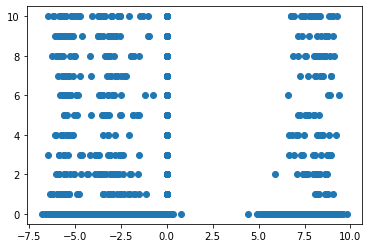

In [13]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

X = features 
Y = user_ratings_table
Y = Y.replace(np.nan,0) 

z = np.zeros((1500, 75), int) #create 
Y = np.nan_to_num(np.concatenate((z,Y)),nan= -1)

n = float(len(X)) # Number of elements in X
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

# Making predictions
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#reg.fit(X, Y_pred)
#reg.score(X, Y)

Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)].all(), [min(Y_pred), max(Y_pred)].all(), color='red')  # regression line
plt.show()

In [37]:
print(user_ratings)
pred = np.mean(Y_pred, axis = 1)
#print(pred.T)
rate = pd.DataFrame(pred.T)
print(rate)
rate['USER ID'] = user_ratings['USER ID']
rate['PRODUCT'] = user_ratings['PRODUCT']
rate['RATING'] = np.round_(pred.T, 3)
rate = rate[['USER ID','PRODUCT', 'RATING']]
#nrate = rate.rename(columns={'0': 'RATING'})
print(rate)

#rate.to_csv("ratings.csv")

       USER ID         PRODUCT  RATING
0       100950  secret postage       4
1       100950     violet saga       4
2       100950  pepper chicago       3
3       100950     nina sailor       2
4       100950    front salami       3
...        ...             ...     ...
33720   117449    garden jimmy       4
33721   117449    evita soviet       8
33722   117449   tourist micro       7
33723   117449  diploma moment       7
33724   117449   story respect       7

[33725 rows x 3 columns]
             0
0     0.090517
1     0.090574
2     0.090336
3     0.090499
4     0.090351
...        ...
4495  0.090339
4496  0.090582
4497  0.090532
4498  0.090363
4499  0.090375

[4500 rows x 1 columns]
      USER ID         PRODUCT  RATING
0      100950  secret postage   0.091
1      100950     violet saga   0.091
2      100950  pepper chicago   0.090
3      100950     nina sailor   0.090
4      100950    front salami   0.090
...       ...             ...     ...
4495   103157    garden jimmy   0.0

,USER ID,PRODUCT,RATING
100950,100950,secret postage,0.091
100956,100950,violet saga,0.091
100962,100950,pepper chicago,0.090
100969,100950,nina sailor,0.090
100974,100950,front salami,0.090
...,...,...,...
125614,103157,garden jimmy,0.090
125622,103157,bandit anatomy,0.091
125629,103157,lotus sherman,0.091
125636,103157,scale nepal,0.090
